In [2]:
print("NAME:- RAMESH BHUTKA")
print("SAP ID:- 5300419003")


NAME:- RAMESH BHUTKA
SAP ID:- 5300419003


In [3]:
import datetime
print(datetime.datetime.now())

2021-05-06 15:54:54.392866


# practical-6

Use the "Run" button to execute the code.

In [4]:
!pip install jovian --upgrade --quiet

In [5]:
import jovian

In [6]:
# Execute this to save new versions of the notebook
jovian.commit(project="practical-6")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rameshbhutka11/practical-6


'https://jovian.ai/rameshbhutka11/practical-6'

In [7]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


In [8]:
# load the dataset
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/Ramesh-Bhutka/AAI/main/employee.csv', delimiter=',')

Dataset includes 14,999 observations, with each row representing one single employee.


Fields in the dataset include the following 10 variables for each line:
- Employee satisfaction level
- Last evaluation score
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

In [9]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['department']= label_encoder.fit_transform(dataset['department'])
dataset['salary']= label_encoder.fit_transform(dataset['salary'])

In [15]:
array = dataset.values
array

array([[0.38, 0.53, 2.  , ..., 7.  , 1.  , 1.  ],
       [0.8 , 0.86, 5.  , ..., 7.  , 2.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 7.  , 2.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 8.  , 1.  , 1.  ],
       [0.11, 0.96, 6.  , ..., 8.  , 1.  , 1.  ],
       [0.37, 0.52, 2.  , ..., 8.  , 1.  , 1.  ]])

In [16]:
# split into input (X) and output (y) variables
X = array[:,0:9]
y = array[:,9]

In [17]:
# callback to stop training when validation accuracy is 100%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        try:
            if logs.get('val_accuracy') == 1.0:
                print("\nReached 100% accuracy, stopping training")
                self.model.stop_training = True
        except:
            pass
        return

callbacks = myCallback()

In [18]:
dataset.shape


(14999, 10)

In [37]:
dataset.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [19]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compile the keras model
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [24]:
# training the model
tf.random.set_seed(18)
history = model.fit(
        X, y,
        epochs = 1000,
        batch_size=1000,
        validation_data = (X, y),
        callbacks = [callbacks]
        )

Epoch 1/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3657 - accuracy: 0.7781 - val_loss: 0.3592 - val_accuracy: 0.8009
Epoch 2/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3525 - accuracy: 0.7995 - val_loss: 0.3502 - val_accuracy: 0.8055
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3506 - accuracy: 0.8041 - val_loss: 0.3501 - val_accuracy: 0.8027
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3497 - accuracy: 0.8058 - val_loss: 0.3497 - val_accuracy: 0.8063
Epoch 5/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3495 - accuracy: 0.8045 - val_loss: 0.3494 - val_accuracy: 0.8061
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3493 - accuracy: 0.8059 - val_loss: 0.3495 - val_accuracy: 0.8023
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3491 - accuracy: 0.8051 - val_loss: 0.3492 - val_accuracy: 0.8065
Epoch 

In [25]:
print(f"Loss : {model.evaluate(X,y)[0]}")
print(f"Accuracy % : {model.evaluate(X,y)[1]*100}")

469/469 [==============================] - 0s 996us/step - loss: 0.2307 - accuracy: 0.9283
Loss : 0.23065802454948425
469/469 [==============================] - 0s 993us/step - loss: 0.2307 - accuracy: 0.9283
Accuracy % : 92.82618761062622


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = model.predict_classes(X)
predictions = predictions.reshape(1,-1)[0]

# confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y, predictions), sep='')
print(f'Accuracy Score: {accuracy_score(y, predictions)*100}%')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion Matrix:
[[10896   532]
 [  544  3027]]
Accuracy Score: 92.82618841256084%


In [29]:
# printing the result in form of confusion matrix and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Classification matrix : \n',confusion_matrix(y, predictions))
from sklearn.metrics import classification_report
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y, predictions)
print('Classification report : \n',matrix)

Classification matrix : 
 [[10896   532]
 [  544  3027]]
Classification report : 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     11428
         1.0       0.85      0.85      0.85      3571

    accuracy                           0.93     14999
   macro avg       0.90      0.90      0.90     14999
weighted avg       0.93      0.93      0.93     14999



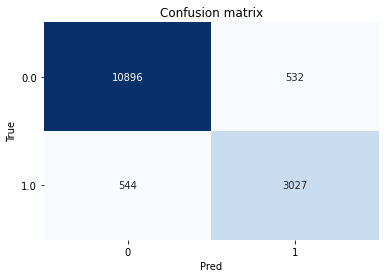

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
classes = np.unique(y)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y, predictions, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

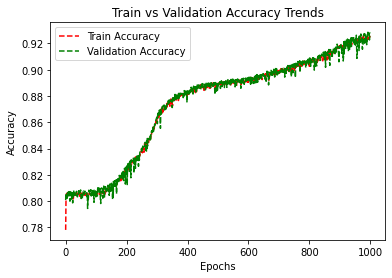

In [35]:
# train and validation accuracy trends
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = [i for i in range(0, 1000)]
plt.plot(epochs, train_accuracy, 'r--', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'g--', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
jovian.commit(project="practical-6")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rameshbhutka11/practical-6


'https://jovian.ai/rameshbhutka11/practical-6'